# EDA (Exploration Data Analysis)

In [1]:
#@title Define if we are on Colab and mount drive { display-mode: "form" }
run_params = {}
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  run_params['IN_COLAB'] = True
except:
  run_params['IN_COLAB'] = False

In [2]:
#@title (COLAB ONLY) Clone GitHub repo { display-mode: "form" }

if run_params['IN_COLAB']:
  !git clone https://github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

In [3]:
#@title Setup environment and Colab general variables { display-mode: "form" }
%%capture
%run colab_conda_setup.ipynb

In [90]:
from fastai.basics import *
from fastai.medical.imaging import *

import pandas as pd
import os
import matplotlib.pyplot as plt

from preprocessing.dicom import *
from utils.dicom import *


Filename.........: E:/Google Drive/DICOMS/08010001306660/20200522.155817.503.34414.PACS0885
Storage type.....: 1.2.840.10008.5.1.4.1.1.1

Patient's name....: 1234, 
Patient id........: 1234
SeriesDescription.: RODILLA AP
Body Part Examined: LOWER LIMB
Photometric Interpretation: MONOCHROME2
Bits Stored: 12
Modality..........: CR
Study Date........: 20200522
Image size.......: 2548 x 1200, 3337930 bytes
Pixel spacing....: None
Slice location...: (missing)


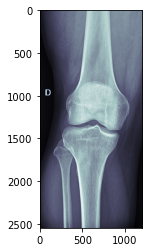

In [94]:
# filename = RAW_FOLDER + '/01010000265254/DN6HRHRGK7HVUeB1BJMI58TIKKAG41D1DU1P8U02CDN8FSGKRC0FK'
# filename = RAW_FOLDER + '/03010001176119/0EHKK04CBOO1Ee7BR8O3GTR4N0VG41DEQ1MEPG0B3CM1DOPN2LBKG'   # GDCM issue
filename = run_params['RAW_FOLDER'] + '/03010001140473/44EIARL2F5R93e6KUKCGCH0T5QBG41D06V8N940P0ALE12N6M6UDE'   # Inverse
# filename = RAW_FOLDER + '/03010001161180/6G2GP08CG0DA9eESVU607SHP50OG41D865OO5M020LHQ3GI2RDH6N'   # Prot Exam (to be deleted)
# filename = ORGANIZE_FOLDER + '/CD/0/01010000265254.dcm'
# filename = RAW_FOLDER + '/36030000376557/20200602.200621.233.354035.PACS3603'                     # Bits Stored -> 8
# filename = RAW_FOLDER + '/25010000745513/15JMRT6QFQLC1e3FEDVIO4AHGDFG41E731PRQO0EE1CT1K62H4LVQ'   # Bits Stored -> 10
# filename = RAW_FOLDER + '/20040000183749/20200604.085023.798.42086.PACS2004'                      # Bits Stored -> 15
# filename = RAW_FOLDER + '/08850002654834/00DUSLOJHH6IRe7B9LBHCM35C9FG41EA1SLAE2040QTR54BHRCG3S'   # Bits Stored -> 16
# filename = RAW_FOLDER + '/28180000184989/5R1L3SRR6IG93e979JJQS7D95BDG41DCJF6NC50TETSKRTPKONOJ7'   # Modality DR
# filename = RAW_FOLDER + '/45010000555562/3J9R99AAVO6GTe945AO28KVV1HGG41EAB3NF7902A4S1LOHA2AN3G'   # Modality DX
# filename = RAW_FOLDER + '/35030000293656/FS4UV5N3QMBFMe2MOO6CC7NU3D3G41DCHMQ6P30E0S0LPQKAK4AE5'   # Modality MR
# filename = RAW_FOLDER + '/08850002589826/54581U7S0N3RJeEICDQVJ1U4EPJG41DS771B330P6T0RIHUQMM0H8'   # Modality RF
# filename = RAW_FOLDER + '/28070000497360/7MQ3KB0HQPQQ5e5KJDRS57T022PG41D36A6LLN04D7G3J8ALUSKUP'   # No Presentation LUT Shape
filename = run_params['RAW_FOLDER'] + '/08010001306660/20200522.155817.503.34414.PACS0885'

dcm = dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dcm.SOPClassUID)
print()

pat_name = dcm.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name....:", display_name)
print("Patient id........:", dcm.PatientID)
print("SeriesDescription.:", dcm.SeriesDescription)
print("Body Part Examined:", dcm.BodyPartExamined)
print("Photometric Interpretation:", dcm.PhotometricInterpretation)
print("Bits Stored:", dcm.BitsStored)
print("Modality..........:", dcm.Modality)
print("Study Date........:", dcm.StudyDate)

if 'PixelData' in dcm:
    rows = int(dcm.Rows)
    cols = int(dcm.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dcm.PixelData)))
    if 'PixelSpacing' in dcm:
        print("Pixel spacing....:", dcm.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dcm.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dcm_scale(dcm), cmap=plt.cm.bone)
plt.show()

## Raw Data EDA

In [17]:
fnames = get_files(run_params['RAW_FOLDER'])
df = pd.DataFrame.from_dicoms(
    fnames
)
df.run_params['T']

█

0     \
                                                                          16   
SpecificCharacterSet                                              ISO_IR 100   
ImageType                                                            DERIVED   
SOPClassUID                                        1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190117113311.12   
...                                                                      ...   
DateOfLastDetectorCalibration                                            NaN   
TimeOfLastDetectorCalibration                                            NaN   
GridFocalDistance                                                        NaN   
MultiFieldOfViewDimensions                                               NaN   
FieldOfViewDimensions1                                                   NaN   

                                                                        1     \
                                                                          16   
SpecificCharacterSet                                              ISO_IR 100   
ImageType                                                            DERIVED   
SOPClassUID                                        1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190117113311.11   
...                                                                      ...   
DateOfLastDetectorCalibration                                            NaN   
TimeOfLastDetectorCalibration                                            NaN   
GridFocalDistance                                                        NaN   
MultiFieldOfViewDimensions                                               NaN   
FieldOfViewDimensions1                                                   NaN   

                                                                       2     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType                                                           DERIVED   
SOPClassUID                                       1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190129103613.4   
...                                                                     ...   
DateOfLastDetectorCalibration                                           NaN   
TimeOfLastDetectorCalibration                                           NaN   
GridFocalDistance                                                       NaN   
MultiFieldOfViewDimensions                                              NaN   
FieldOfViewDimensions1                                                  NaN   

                                                                       3     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType                                                           DERIVED   
SOPClassUID                                       1.2.840.10008.5.1.4.1.1.1   
SOPInstanceUID                 1216.1158.1243.113.1196.184.20190129103613.3   
...                                                                     ...   
DateOfLastDetectorCalibration                                           NaN   
TimeOfLastDetectorCalibration                                           NaN   
GridFocalDistance                                                       NaN   
MultiFieldOfViewDimensions                                              NaN   
FieldOfViewDimensions1                                                  NaN   

                                                                       4     \
                                                                         16   
SpecificCharacterSet                                             ISO_IR 100   
ImageType      

In [49]:
metadata_save_path = run_params['PATH_PREFIX'] + 'metadata_raw_local.csv'
# metadata_save_path = PATH_PREFIX + 'metadata_raw.csv'

In [50]:
df = pd.read_csv(metadata_save_path)
# df.to_csv(metadata_save_path)

In [24]:
df.ViewPosition.value_counts()

AP     25470
LAT    13675
OBL      393
PA       271
LL       181
Name: ViewPosition, dtype: int64

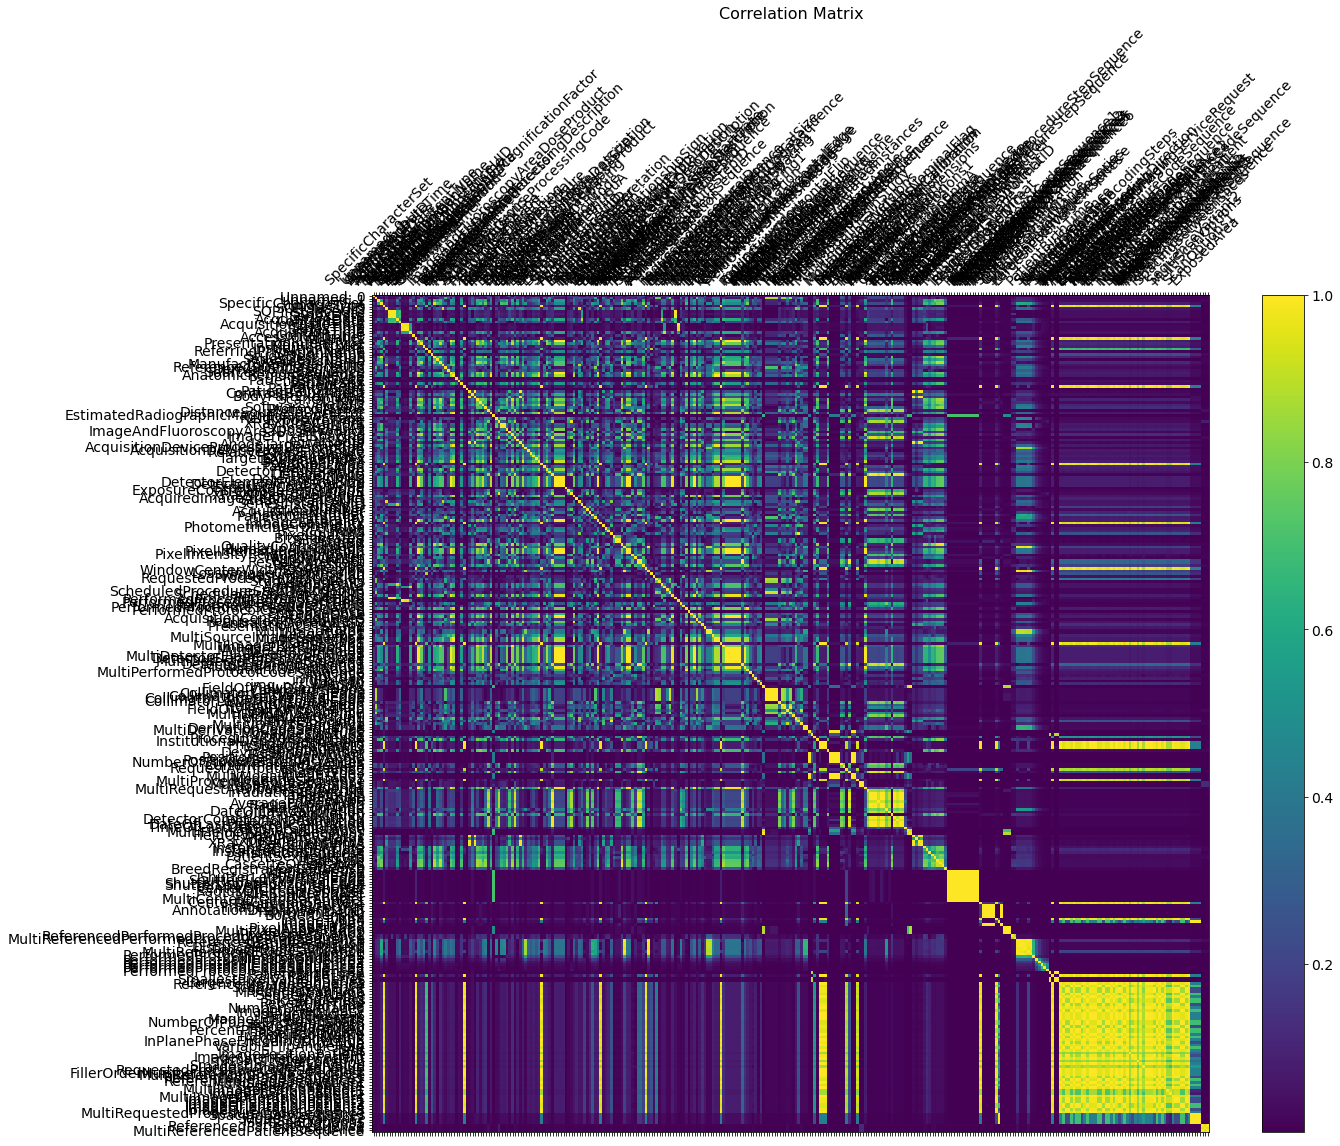

In [34]:
corr = df.astype('string').astype('category').apply(lambda x: x.cat.codes, axis=0).corr()

corr = corr.loc[corr.notnull().any(axis=0),corr.notnull().any(axis=1)].abs()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [47]:
pd.set_option('max_rows', 100)
repr_flds = [
    'Modality',
    'BitsStored',
]
pivot_df = df.pivot_table(values=['img_mean','img_std','img_max','img_min','PatientID', 'fname'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min', 'img_std':'mean','PatientID':'count', 'fname': 'max'})
display(pivot_df)

PatientID  \
Modality BitsStored              
CR       8                 597   
         10                  6   
         12              46695   
         15                200   
         16               1274   
DR       12                  2   
DX       12                  2   
MR       12                177   
RF       10                  1   

                                                                                                                            fname  \
Modality BitsStored                                                                                                                 
CR       8                             /content/gdrive/My Drive/Dataset/DICOMS/36030000376557/20200602.200621.233.354035.PACS3603   
         10          /content/gdrive/My Drive/Dataset/DICOMS/25010000745513/15JMRT6QFQLC1e3FEDVIO4AHGDFG41E731PRQO0EE1CT1K62H4LVQ   
         12          /content/gdrive/My Drive/Dataset/DICOMS/52010000114101/6D7RQI97KE05Oe7V44OBIRKCI6JG41EBE9SLVH0ECFF75QM6MPPE2   
         15                             /content/gdrive/My Drive/Dataset/DICOMS/20040000183749/20200604.085023.798.42086.PACS2004   
         16          /content/gdrive/My Drive/Dataset/DICOMS/14010001206676/971D0S613637GeDJQL12L3GADIAG41DV1NG0L00E4EC1E5O8DA0FL   
DR       12          /content/gdrive/My Drive/Dataset/DICOMS/28180000184989/5R1L3SRR6IG93e979JJQS7D95BDG41DCJF6NC50TETSKRTPKONOJ7   
DX       12          /content/gdrive/My Drive/Dataset/DICOMS/45010000555562/3J9R99AAVO6GTe945AO28KVV1HGG41EAB3NF7902A4S1LOHA2AN3G   
MR       12          /content/gdrive/My Drive/Dataset/DICOMS/35030000293656/FS4UV5N3QMBFMe2MOO6CC7NU3D3G41DCHMQ6P30E0S0LPQKAK4AE5   
RF       10          /content/gdrive/My Drive/Dataset/DICOMS/08850002589826/54581U7S0N3RJeEICDQVJ1U4EPJG41DS771B330P6T0RIHUQMM0H8   

                     img_max      img_mean  img_min      img_std  
Modality BitsStored                                               
CR       8               255     58.597918        0    69.640267  
         10             1023    797.783748        0   182.298432  
         12             4108   1679.086292        0   902.850076  
         15            32767  22500.425953        0  4489.050104  
         16            65535  17614.933217        0  9221.585750  
DR       12             4011   1434.497994      102   973.765950  
DX       12             4095   2462.047446        0   745.097560  
MR       12              966     67.646416        0    63.018431  
RF       10              850    315.657502        0   268.500017

In [27]:
pd.set_option('max_rows', 300)
repr_flds = [
    'SeriesDescription',
    'BodyPartExamined',
    # 'Modality',
    # 'StudyDescription',
    # 'ViewPosition',
    # 'AcquiredImageAreaDoseProduct'
]
pivot_df = df[df['BodyPartExamined'].isin(['LOWER LIMB', 'KNEE'])].pivot_table(values=['img_mean','img_std','img_max','img_min','PatientID', 'fname'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min', 'img_std':'mean','PatientID':'count', 'fname': 'max'})
display(pivot_df)

PatientID  \
SeriesDescription            BodyPartExamined              
AXIAL DE ROTULAS             KNEE                     16   
Ambas rodillas (telem) AP    KNEE                      2   
CALCANEO AXIAL DIRECTO       LOWER LIMB                1   
CALCANEO LAT DIRECTO         LOWER LIMB                1   
DEDOS AP PIE DIRECTO         LOWER LIMB                6   
FEMUR AP                     LOWER LIMB                6   
FEMUR LAT                    LOWER LIMB                4   
PIE AP DIRECTO               LOWER LIMB               28   
PIE LAT                      LOWER LIMB                2   
PIE LAT EN CARGA             LOWER LIMB                2   
PIE OBL DIRECTO              LOWER LIMB               26   
RODILLA AP                   KNEE                   1158   
                             LOWER LIMB            13485   
RODILLA AP CARGA MONOPODAL   LOWER LIMB              112   
RODILLA INTERCONDILEA        KNEE                      4   
                             LOWER LIMB                1   
RODILLA LAT                  KNEE                   1374   
                             LOWER LIMB            13707   
RODILLA LAT EN CARGA         LOWER LIMB              147   
RODILLAS AP                  KNEE                    192   
                             LOWER LIMB              180   
RODILLAS AP EN CARGA         LOWER LIMB                4   
ROTULA AXIAL                 KNEE                      4   
ROTULA AXIAL DIRECTO         LOWER LIMB              346   
ROTULA AXIAL MESA            LOWER LIMB                4   
Rodilla  Lat                 KNEE                     56   
Rodilla AP                   KNEE                     73   
Rodilla AP y LAT             KNEE                     94   
Rodillas AP                  KNEE                     30   
Rodillas LAT                 KNEE                     16   
Rotula Axial                 KNEE                      1   
T Rodilla lat                KNEE                      2   
T098aDER Rodilla a.p.        KNEE                     31   
T098bDER Rodilla lat.        KNEE                     25   
TIBIA AP DIRECTO             LOWER LIMB               19   
TIBIA LAT DIRECTO            LOWER LIMB               15   
TOBILLO AP                   LOWER LIMB               79   
TOBILLO EN CARGA AP          LOWER LIMB                3   
TOBILLO EN CARGA LAT         LOWER LIMB                4   
TOBILLO LAT                  LOWER LIMB               81   
W098aDER Rodilla a.p.        KNEE                      6   
W098bDER Rodilla lat.        KNEE                      3   
X098aL Knee a.p.             KNEE                     25   
X098aR Knee a.p.             KNEE                      4   
ambas rodillas AP            KNEE                    253   
ambas rodillas LAT           KNEE                     46   
ambas rodillas LAT D         KNEE                     22   
ambas rodillas LAT I         KNEE                     12   
ambolos dous xeonllos AP     KNEE                      6   
ambolos dous xeonllos LAT    KNEE                      1   
pd_tse_fs_sag                KNEE                     33   
rodilla  AP y LAT            KNEE                   1547   
rodilla  LAT                 KNEE                   2382   
rodilla (telemando) AP y LAT KNEE                    159   
rodilla 1P AP                KNEE                     10   
rodilla 1P LAT               KNEE                      8   
rodilla AP                   KNEE                   4585   
rodilla AP y LAT             KNEE                    289   
rodilla LAT                  KNEE                   1170   
rodilla LAT dcha             KNEE                      8   
rodilla LAT izda             KNEE                      4   
rodilla OBL                  KNEE                     25   
rodilla seriada              KNEE                      6   
rodillas OBL dcha            KNEE                      1   
rodillas OBL izda            KNEE                      1   
rótula AXIAL               

In [93]:
def get_pixel_data(dcm):
    try:
        data = dcm.pixel_array
    except RuntimeError as e:
        data = None
        print(f'RuntimeError on file {dcm.fname}: ' + e)
    return data


def get_subplot_rows_cols(num_plots, n_cols = [3,4,5]):
    """ Calculate number row and cols for a pretty grid """
    max_cols = max(n_cols)
    if num_plots // max_cols == 0:
        subplot_rows = 1
        subplot_cols = num_plots
    else:
        found = False
        better_res = max(n_cols)
        better_n = None
        for n in sorted(n_cols, reverse=True):
            res = num_plots % n
            if res == 0:
                subplot_rows = num_plots // n
                subplot_cols = n
                found = True
                break
            elif better_res > res:
                better_res = res
                better_n = n

        if not found:
            subplot_rows = num_plots // better_n + 1
            subplot_cols = better_n
    return subplot_rows, subplot_cols


def plot_DCMs(fnames, max_samples=None, n_cols=[3,4,5], figsize=(15,15)):
    if max_samples is None:
        n = len(fnames)
    else:
        n = min(len(fnames), max_samples)
    rows, cols = get_subplot_rows_cols(n, n_cols)
    fig, axs = plt.subplots(rows, cols, figsize=figsize)

    for i, fname in enumerate(fnames[:n]):
        dcm = dcmread(fname)
        row = i // cols
        col = i % cols

        title = dcm.SeriesDescription + '|' + dcm.BodyPartExamined

        axs[row, col].imshow(dcm_scale(dcm), cmap=plt.cm.bone)
        axs[row, col].set_title(title)

        axs[row, col].label_outer()

    fig.subplots_adjust()
    fig.show()

def get_each_case_samples(df, all_keys, max_samples_per_case=5):
    """ Extract all the different cases on `all_keys` and creating a DataFrame with the number set for all the cases """
    cases_df = df[all_keys].drop_duplicates()
    cases_df = cases_df[cases_df[all_keys].notnull().any(1)]
    
    concat_list = []
    for i in range(len(cases_df.index)):
        # print(cases_df.iloc[i][all_keys])
        concat_list.append(
            df[
                (
                    df[all_keys] == cases_df.iloc[i][all_keys]
                ).all(axis=1)
            ].sample(max_samples_per_case, replace=False)
        )

    return pd.concat(concat_list)

In [10]:
# Check starts with
correct_check_DICOM_dict = {
    'SeriesDescription': ['RODILLA AP', 'RODILLAS AP', 'PIERNA AP MESA'],
    'BodyPartExamined': ['LOWER LIMB', 'KNEE']
}

doubt_check_DICOM_dict = {
    'SeriesDescription': ['RODILLA INTERCONDILEA', 'RODILLA AP CARGA MONOPODAL', 'RODILLAS EN CARGA', 'T Rodilla lat', 'PIERNA AP MESA']
}

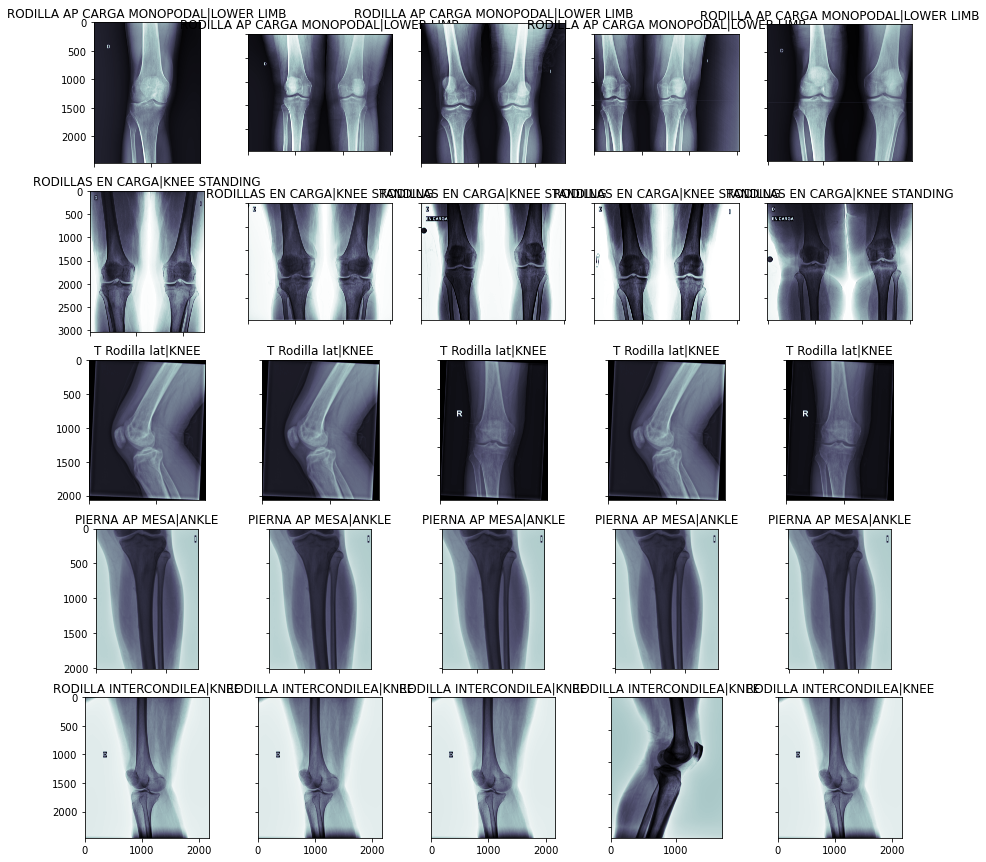

In [11]:
# df_match = df_check_DICOM(df, doubt_check_DICOM_dict)
df_match = sample_df_check_DICOM(df, doubt_check_DICOM_dict, max_samples_per_case=5)
plot_DCMs(df_match['fname'], n_cols=[5])

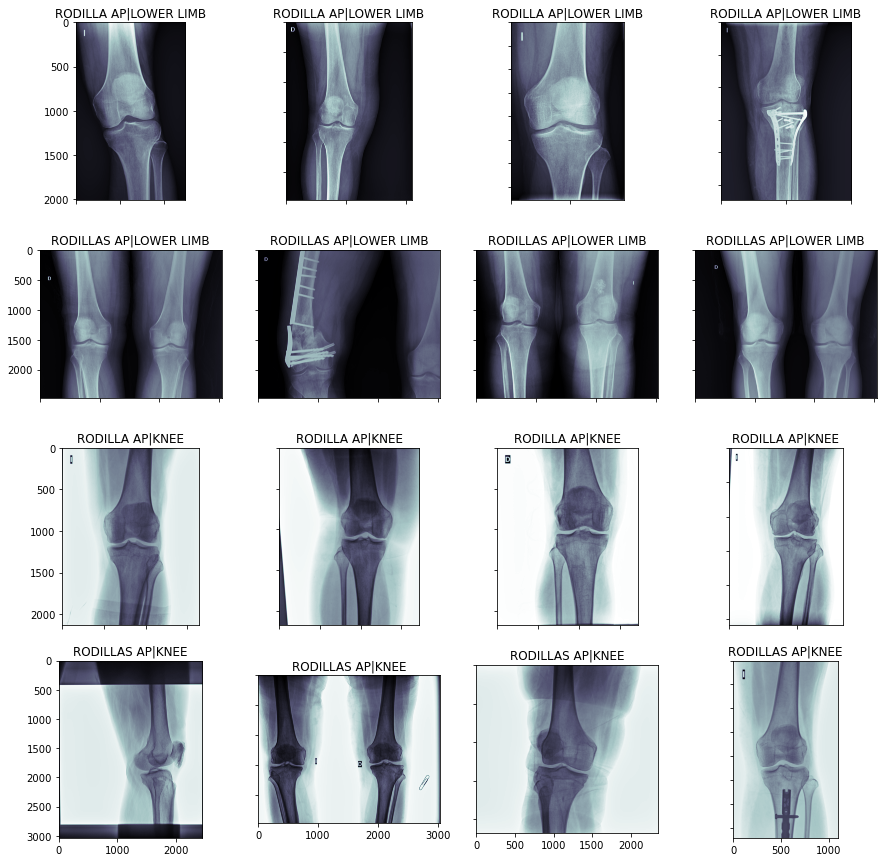

In [15]:
# df_match = df_check_DICOM(df, correct_check_DICOM_dict)
df_match = sample_df_check_DICOM(df, correct_check_DICOM_dict, max_samples_per_case=4)
plot_DCMs(df_match['fname'], n_cols=[4])

## Filtered Data EDA

In [7]:
# Transform metadata to DataFrame
df = pd.DataFrame.from_dicoms(
    get_files(run_params['ORGANIZE_FOLDER'], extensions='.dcm')
)

█

In [21]:
metadata_save_path = run_params['PATH_PREFIX'] + 'metadata_pending_class.csv'

In [22]:
df = pd.read_csv(metadata_save_path)
# df.to_csv(metadata_save_path)

In [49]:
df.loc[df['Laterality'].isnull(),'Laterality'] = ''

In [61]:
df.columns[df.columns.str.startswith('Tra')]

Index([], dtype='object')

In [65]:
# df['combo'] = (df['Laterality'].astype('string')+df['InstanceNumber'].astype('string'))
df['DetectorType'].value_counts()

SCINTILLATOR    420
FDX4343RPW      185
FDX3543RPW      153
Name: DetectorType, dtype: int64

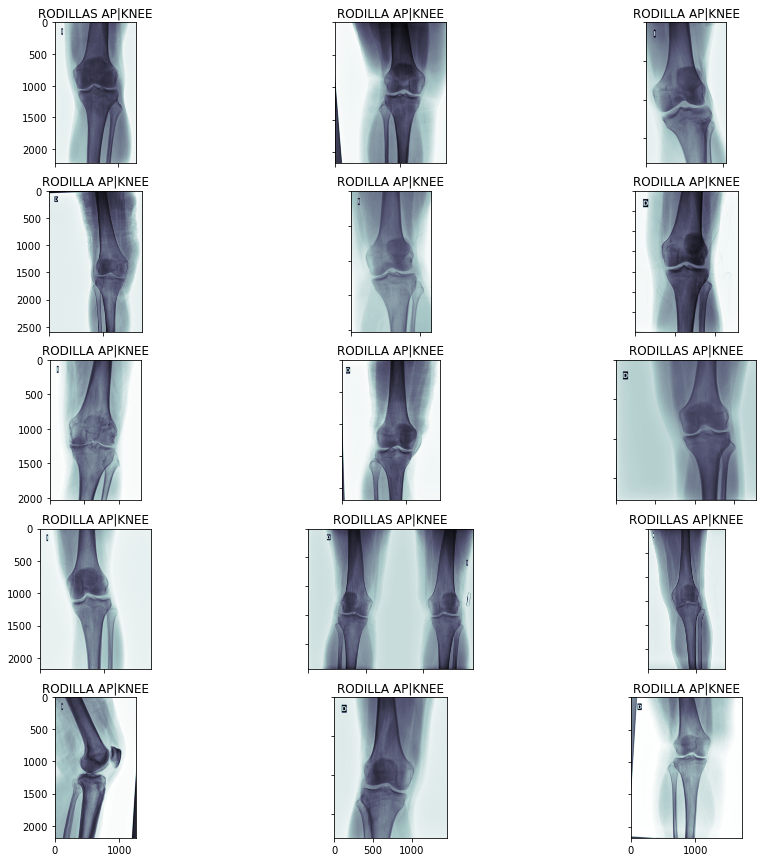

In [55]:
plot_DCMs(df[df['combo'].isin(['R2.0'])]['fname'], n_cols=[3])

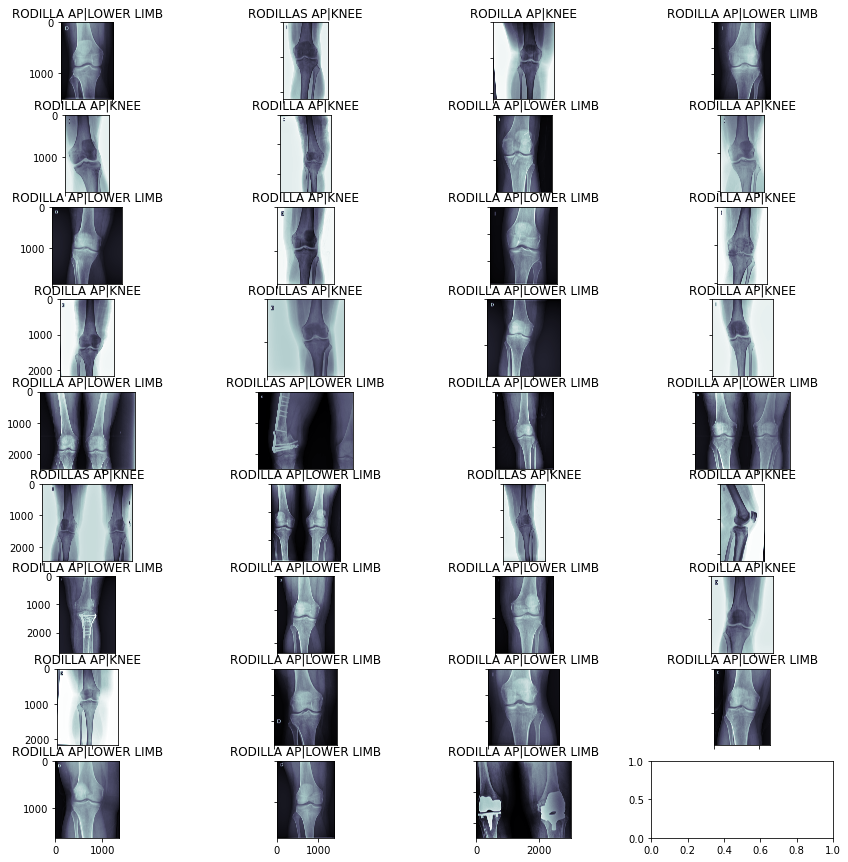

In [37]:
plot_DCMs(df[df['InstanceNumber'] > 2]['fname'], n_cols=[4])

In [66]:
repr_flds = ['DetectorType'] + ['SeriesDescription','BodyPartExamined']
display(df.pivot_table(values=['img_mean','img_max','img_min','PatientID'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min','PatientID':'count'}))
display(df.pivot_table(values=['WindowCenter','WindowWidth', 'RescaleIntercept', 'RescaleSlope'], index=repr_flds,
                   aggfunc={'mean','max','min','std','median'}))

PatientID  img_max  \
DetectorType SeriesDescription BodyPartExamined                       
FDX3543RPW   RODILLA AP        LOWER LIMB               91     4094   
             RODILLAS AP       LOWER LIMB               62     4095   
FDX4343RPW   RODILLA AP        LOWER LIMB              184     4091   
             RODILLAS AP       LOWER LIMB                1     4071   
SCINTILLATOR RODILLA AP        KNEE                    361     4095   
             RODILLAS AP       KNEE                     59     4095   

                                                    img_mean  img_min  
DetectorType SeriesDescription BodyPartExamined                        
FDX3543RPW   RODILLA AP        LOWER LIMB        1279.556792        3  
             RODILLAS AP       LOWER LIMB        1296.395609        1  
FDX4343RPW   RODILLA AP        LOWER LIMB        1314.931576        3  
             RODILLAS AP       LOWER LIMB        1701.237045      273  
SCINTILLATOR RODILLA AP        KNEE              2918.654298        0  
             RODILLAS AP       KNEE              2736.047988        0

RescaleIntercept              \
                                                             max mean median   
DetectorType SeriesDescription BodyPartExamined                                
FDX3543RPW   RODILLA AP        LOWER LIMB                    0.0  0.0    0.0   
             RODILLAS AP       LOWER LIMB                    0.0  0.0    0.0   
FDX4343RPW   RODILLA AP        LOWER LIMB                    0.0  0.0    0.0   
             RODILLAS AP       LOWER LIMB                    0.0  0.0    0.0   
SCINTILLATOR RODILLA AP        KNEE                          0.0  0.0    0.0   
             RODILLAS AP       KNEE                          0.0  0.0    0.0   

                                                          RescaleSlope       \
                                                 min  std          max mean   
DetectorType SeriesDescription BodyPartExamined                               
FDX3543RPW   RODILLA AP        LOWER LIMB        0.0  0.0          1.0  1.0   
             RODILLAS AP       LOWER LIMB        0.0  0.0          1.0  1.0   
FDX4343RPW   RODILLA AP        LOWER LIMB        0.0  0.0          1.0  1.0   
             RODILLAS AP       LOWER LIMB        0.0  NaN          1.0  1.0   
SCINTILLATOR RODILLA AP        KNEE              0.0  0.0          1.0  1.0   
             RODILLAS AP       KNEE              0.0  0.0          1.0  1.0   

                                                                 WindowCenter  \
                                                median  min  std          max   
DetectorType SeriesDescription BodyPartExamined                                 
FDX3543RPW   RODILLA AP        LOWER LIMB          1.0  1.0  0.0       2048.0   
             RODILLAS AP       LOWER LIMB          1.0  1.0  0.0       2048.0   
FDX4343RPW   RODILLA AP        LOWER LIMB          1.0  1.0  0.0       2048.0   
             RODILLAS AP       LOWER LIMB          1.0  1.0  NaN       2048.0   
SCINTILLATOR RODILLA AP        KNEE                1.0  1.0  0.0       2048.0   
             RODILLAS AP       KNEE                1.0  1.0  0.0       2048.0   

                                                                              \
                                                   mean  median     min  std   
DetectorType SeriesDescription BodyPartExamined                                
FDX3543RPW   RODILLA AP        LOWER LIMB        2048.0  2048.0  2048.0  0.0   
             RODILLAS AP       LOWER LIMB        2048.0  2048.0  2048.0  0.0   
FDX4343RPW   RODILLA AP        LOWER LIMB        2048.0  2048.0  2048.0  0.0   
             RODILLAS AP       LOWER LIMB        2048.0  2048.0  2048.0  NaN   
SCINTILLATOR RODILLA AP        KNEE              2048.0  2048.0  2048.0  0.0   
             RODILLAS AP       KNEE              2048.0  2048.0  2048.0  0.0   

                                                WindowWidth                  \
                                                        max    mean  median   
DetectorType SeriesDescription BodyPartExamined                               
FDX3543RPW   RODILLA AP        LOWER LIMB            4096.0  4096.0  4096.0   
             RODILLAS AP       LOWER LIMB            4096.0  4096.0  4096.0   
FDX4343RPW   RODILLA AP        LOWER LIMB            4096.0  4096.0  4096.0   
             RODILLAS AP       LOWER LIMB            4096.0  4096.0  4096.0   
SCINTILLATOR RODILLA AP        KNEE                  4096.0  4096.0  4096.0   
             RODILLAS AP       KNEE                  4096.0  4096.0  4096.0   

                                                              
                                                    min  std  
DetectorType SeriesDescription BodyPartExamined               
FDX3543RPW   RODILLA AP        LOWER LIMB        4096.0  0.0  
             RODILLAS AP       LOWER LIMB        4096.0  0.0  
FDX4343RPW   RODILLA AP        LOWER LIMB        4096.0  0.0  
             RODILLAS AP       LOWER LIMB        4096.0  NaN  
SCINTILLATO

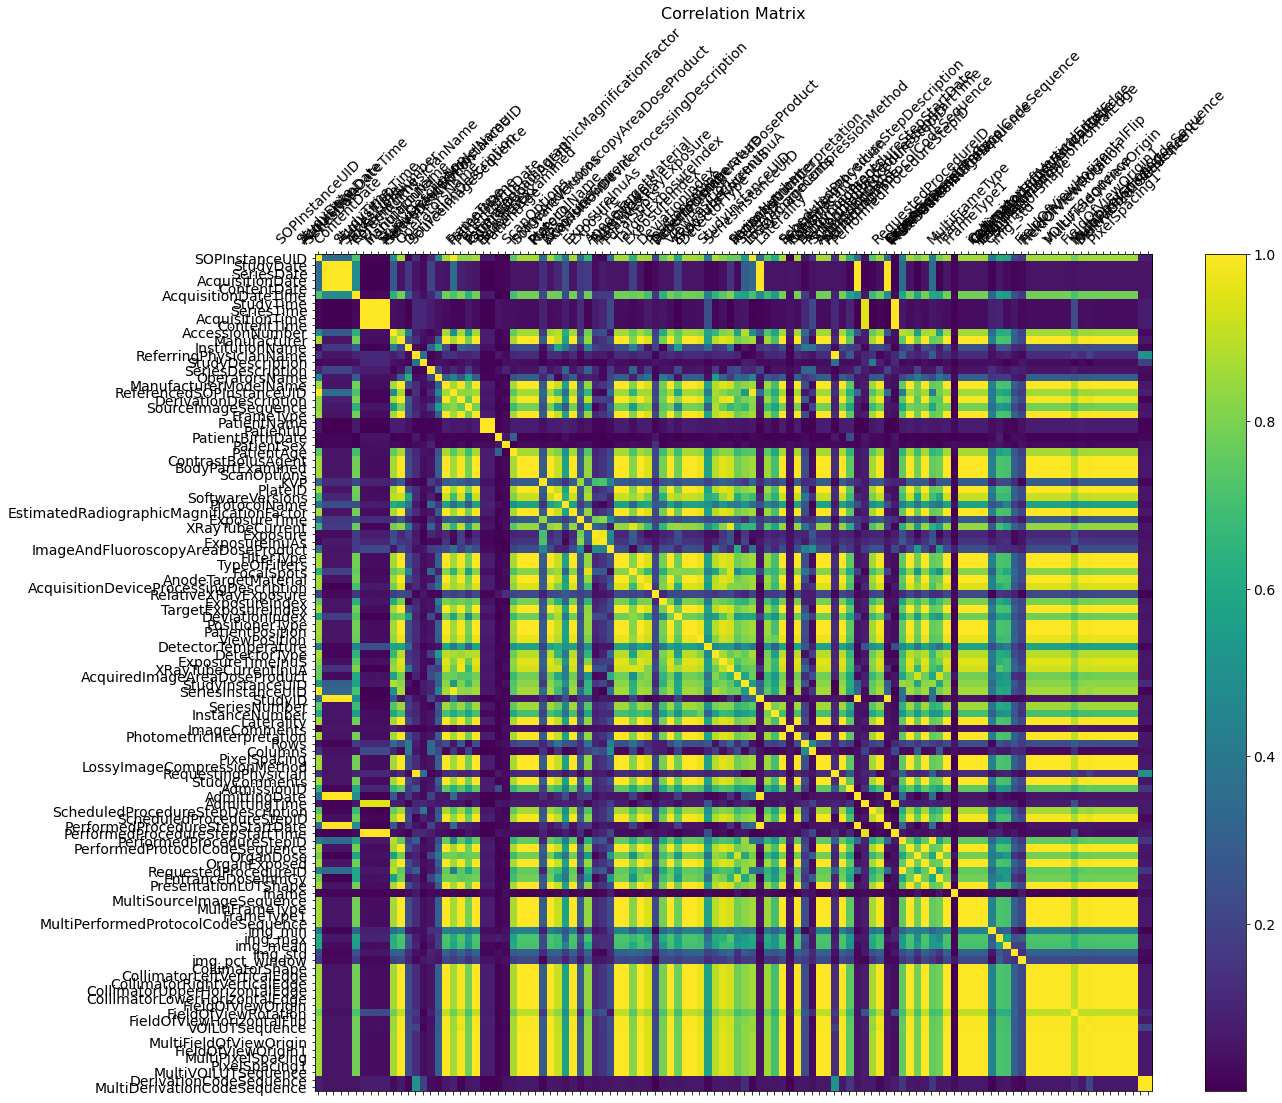

In [9]:
corr = df.astype('string').astype('category').apply(lambda x: x.cat.codes, axis=0).corr()

corr = corr.loc[corr.notnull().any(axis=0),corr.notnull().any(axis=1)].abs()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

The DeviationIndex seems to be a potential features related to the `img_mean` and `img_std`

When `PresentationLUTShape` is `INVERSE` then a transformation like $(Pixels - WindowWidth) * (-1)$ should be done